In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

In [156]:
# Import weather data from .txt file, skip first two rows

df = pd.read_csv("21_10_data.txt", header=None, skiprows=2, parse_dates=[[0, 1]], dayfirst = True, sep="\t", na_values = "---")
df.head()

,0_1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,2021-10-01 00:30:00,10.7,10.7,10.3,90,9.1,8.0,SE,4.0,12.0,...,19.0,62,11.6,18.6,11.43,1.1718,699,1,100.0,30
1,2021-10-01 01:00:00,10.7,10.8,10.6,88,8.8,9.0,SE,4.5,14.0,...,19.0,62,11.6,18.6,11.43,1.1710,701,1,100.0,30
2,2021-10-01 01:30:00,10.6,10.8,10.6,87,8.5,9.0,SE,4.5,13.0,...,19.0,62,11.6,18.6,11.43,1.1703,698,1,100.0,30
3,2021-10-01 02:00:00,10.6,10.7,10.5,87,8.5,8.0,SE,4.0,13.0,...,19.1,61,11.4,18.7,11.25,1.1695,701,1,100.0,30
4,2021-10-01 02:30:00,10.8,10.9,10.6,86,8.6,9.0,SE,4.5,15.0,...,19.2,61,11.5,18.8,11.25,1.1680,701,1,100.0,30


In [157]:
# Replace headers

header = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.', 'Wind Speed',
 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index',
 'Bar', 'Rain', 'Rain Rate', 'Heat D-D', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew',
 'In Heat', 'In EMC', 'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.']

df.columns = header
df.head()
# df.dtypes
# Other values
# Solar Rad.', 'Solar Energy', 'Hi Solar Rad.', 'UV Index', 'UV Dose', 'Hi UV', 

,DateTime,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2021-10-01 00:30:00,10.7,10.7,10.3,90,9.1,8.0,SE,4.0,12.0,...,19.0,62,11.6,18.6,11.43,1.1718,699,1,100.0,30
1,2021-10-01 01:00:00,10.7,10.8,10.6,88,8.8,9.0,SE,4.5,14.0,...,19.0,62,11.6,18.6,11.43,1.1710,701,1,100.0,30
2,2021-10-01 01:30:00,10.6,10.8,10.6,87,8.5,9.0,SE,4.5,13.0,...,19.0,62,11.6,18.6,11.43,1.1703,698,1,100.0,30
3,2021-10-01 02:00:00,10.6,10.7,10.5,87,8.5,8.0,SE,4.0,13.0,...,19.1,61,11.4,18.7,11.25,1.1695,701,1,100.0,30
4,2021-10-01 02:30:00,10.8,10.9,10.6,86,8.6,9.0,SE,4.5,15.0,...,19.2,61,11.5,18.8,11.25,1.1680,701,1,100.0,30


In [158]:
# Get Month and Year of data for Labels and filenames

FileMonthYear = df['DateTime'][0].strftime('%y_%m')
MonthYear = str(df['DateTime'][0].month_name() + ' ' + str(df['DateTime'][0].year))

In [159]:
# Function to create list of max, min and mean
    
def summary_new(column):
    mx = df[column].max()
    mn = df[column].min()
    av = round(df[column].mean(), 1)
    return [
        ['Max', mx],
        ['Min', mn],
        ['Average', av]
    ]

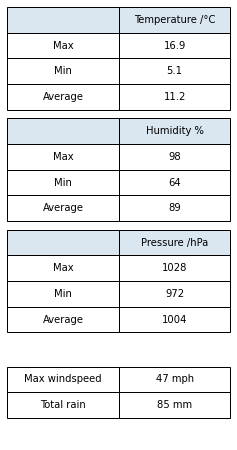

In [160]:
# Create variables to sort summary values of temperature, humidity and pressure

temps = summary_new('Temp Out')
humds = summary_new('Out Hum')
press = summary_new('Bar')

# Convert pressure and humidity figures to whole numbers

for h in humds:
    h[1] = int(h[1])
for p in press:
    p[1] = int(p[1])
    

# Get over summary figures

max_wind = str(int(df["Hi Speed"].max())) + " mph"
total_rain = str(int(df["Rain"].sum())) + " mm"

summary = [
            ["Max windspeed", max_wind],
            ["Total rain", total_rain]
            ]

# Define figure and axes
fig_table, (ax_table1, ax_table2, ax_table3, ax_table4) = plt.subplots(4)

# Create headers for table
temp_headers = ['','Temperature /°C']
humd_headers = ['', 'Humidity %']
press_headers = ['', 'Pressure /hPa']

# Create colourmap for table
ccolors = plt.cm.BuPu(np.full(len(temp_headers), 0.15))

# Create three table for values

table1 = ax_table1.table(cellText=temps, colLabels=temp_headers, colColours=ccolors, loc='center', cellLoc='center')
ax_table1.axis('off')

table2 = ax_table2.table(cellText=humds, colLabels=humd_headers, colColours=ccolors, loc='center', cellLoc='center')
ax_table2.axis('off')

table3 = ax_table3.table(cellText=press, colLabels=press_headers, colColours=ccolors, loc='center', cellLoc='center')
ax_table3.axis('off')

table4 = ax_table4.table(cellText=summary, loc='center', cellLoc='center')
ax_table4.axis('off')

# Other useful commands
# ax_table3.set_title("Pressure /hPa")
# table1.auto_set_column_width(col=[0,1])

# Turn off auto font size and set font size to 10

table1.auto_set_font_size(False)
table2.auto_set_font_size(False)
table3.auto_set_font_size(False)
table4.auto_set_font_size(False)
table1.set_fontsize(10)
table2.set_fontsize(10)
table3.set_fontsize(10)
table4.set_fontsize(10)

# Set height and width

fig_table.set_figheight(8)
fig_table.set_figwidth(4)

# Tidy up layout

#fig_table.tight_layout()
plt.subplots_adjust(hspace = 0.1)

# Plot graph

plt.show()

# Save table as .png

fig_table.set_facecolor('white')
fig_table.savefig(FileMonthYear + "_table" + '.png', bbox_inches='tight', dpi=600)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


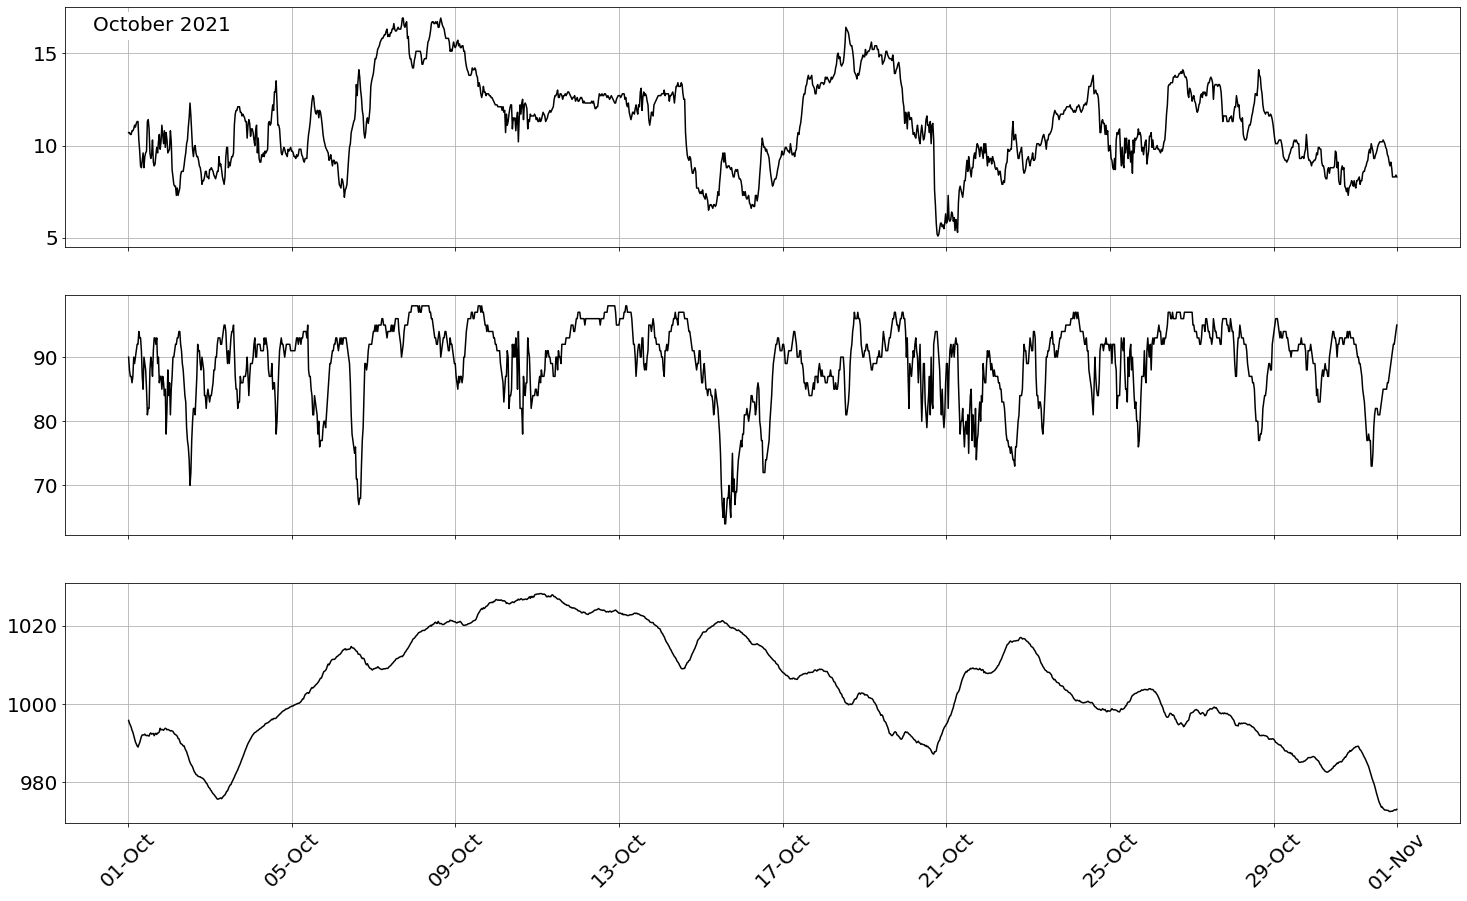

In [161]:
# Plot graphs

dates = df.loc[: , "DateTime"]
temp = df.loc[: , "Temp Out"]
humdity = df.loc[: , "Out Hum"]
pressure = df.loc[: , "Bar"]

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(dates, temp, color = "black")
ax1.tick_params(labelbottom = False)
ax1.tick_params(axis ='y', labelsize = 20)
ax1.grid()

ax2.plot(dates, humdity, color = "black")
ax2.tick_params(labelbottom = False)
ax2.tick_params(axis = 'y', labelsize = 20)
ax2.grid()

ax3.plot(dates, pressure, color = "black")
ax3.tick_params(axis = 'y', labelsize = 20)
ax3.tick_params(axis = 'x', labelsize = 20, labelrotation = 45)
ax3.grid()

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

fig.set_figheight(15)
fig.set_figwidth(25)

ax1.annotate(MonthYear, xy = (0.02,0.9), xycoords='axes fraction', fontsize=20, backgroundcolor="white")

fig.set_facecolor('white')
fig.savefig(FileMonthYear + "_summary" + '.png', bbox_inches='tight', dpi=600)

# New graph with rain

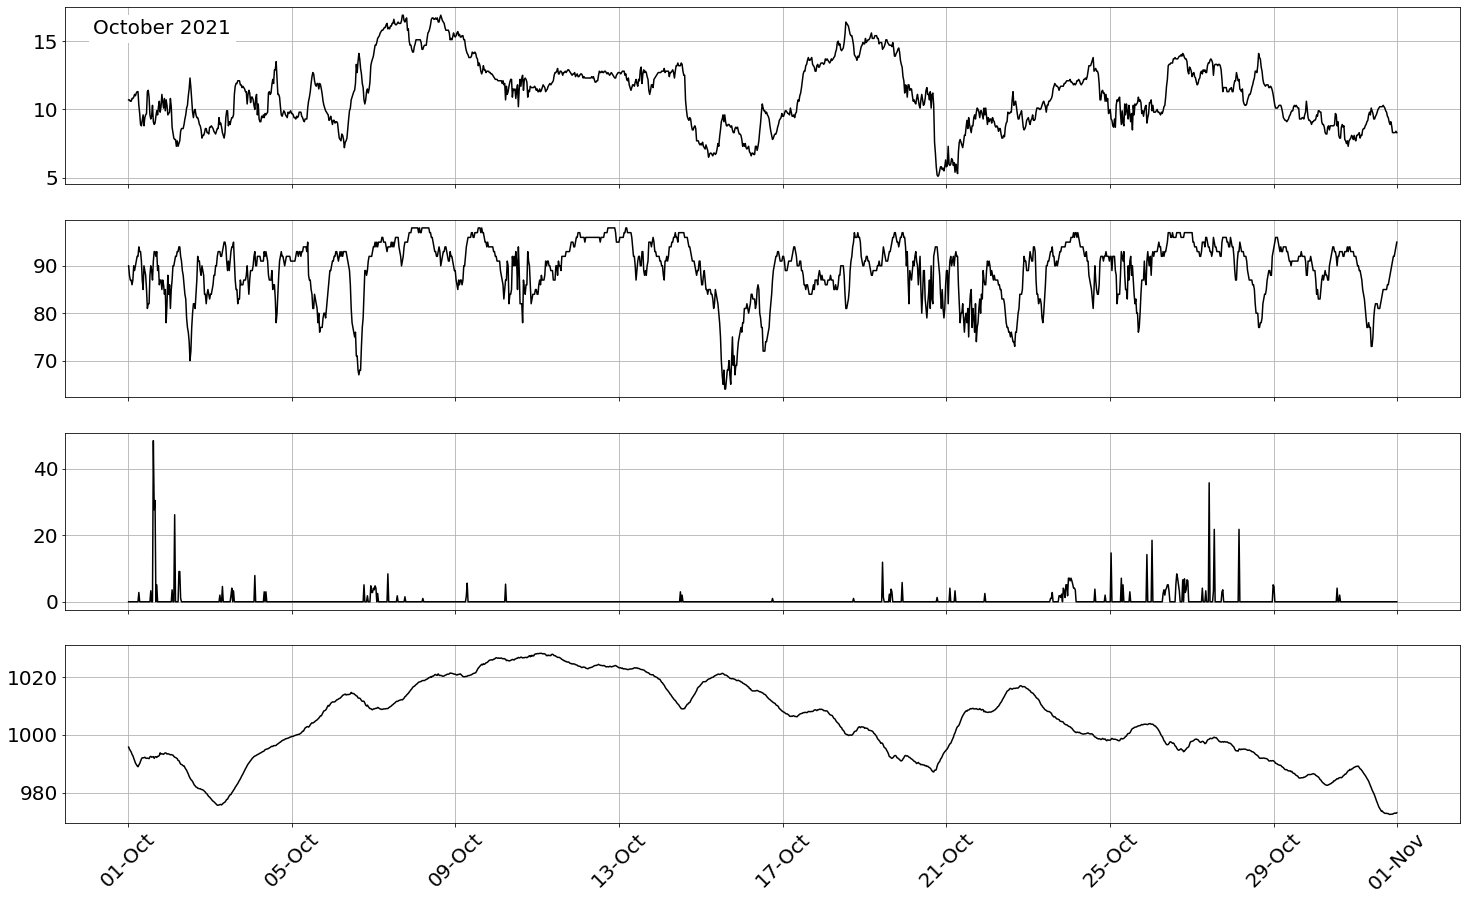

In [129]:
# Plot graphs with rain

dates = df.loc[: , "DateTime"]
temp = df.loc[: , "Temp Out"]
humdity = df.loc[: , "Out Hum"]
rain = df.loc[: , "Rain Rate"]
pressure = df.loc[: , "Bar"]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

ax1.plot(dates, temp, color = "black")
ax1.tick_params(labelbottom = False)
ax1.tick_params(axis ='y', labelsize = 20)
ax1.grid()

ax2.plot(dates, humdity, color = "black")
ax2.tick_params(labelbottom = False)
ax2.tick_params(axis = 'y', labelsize = 20)
ax2.grid()

ax3.plot(dates, rain, color = "black")
ax3.tick_params(labelbottom = False)
ax3.tick_params(axis = 'y', labelsize = 20)
ax3.grid()

ax4.plot(dates, pressure, color = "black")
ax4.tick_params(axis = 'y', labelsize = 20)
ax4.tick_params(axis = 'x', labelsize = 20, labelrotation = 45)
ax4.grid()

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

fig.set_figheight(15)
fig.set_figwidth(25)

ax1.annotate(MonthYear, xy = (0.02,0.85), xycoords='axes fraction', fontsize=20, backgroundcolor="white")

fig.set_facecolor('white')
fig.savefig(FileMonthYear + "_summary_with_rain" + '.png', bbox_inches='tight', dpi=600)

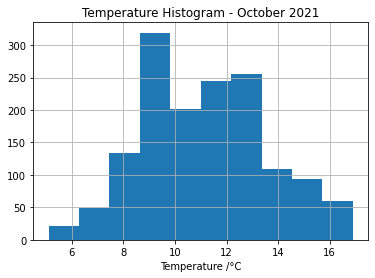

In [145]:
# Histogram of Temperatures

df.hist(column='Temp Out')
plt.title("Temperature Histogram - " + MonthYear, fontsize=12)
plt.xlabel("Temperature /°C", fontsize=10)
plt.savefig(FileMonthYear + '_temperature_histogram.png', facecolor='w', bbox_inches='tight', dpi=600)

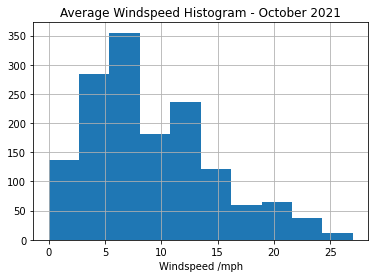

In [146]:
# Histogram of Average windspeeds

df.hist(column = 'Wind Speed')
plt.title("Average Windspeed Histogram - " + MonthYear, fontsize=12)
plt.xlabel("Windspeed /mph", fontsize=10)
plt.savefig(FileMonthYear + '_windspeed_histogram.png', facecolor='w', bbox_inches='tight', dpi=600)